In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [5]:
iris = load_iris()
X = iris.data
y = iris.target
print("Original shape of data:", X.shape)

Original shape of data: (150, 4)


In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
pca = PCA(n_components=0.95)
pca.fit(X_scaled)
X_reduced = pca.transform(X_scaled)

In [15]:
print("Reduced shape of data:",X_reduced.shape)
print("Number of components selected:",pca.n_components_)
print("Explained Variance Retained:",pca.explained_variance_ratio_)
print("Total Variance Retained:",
 np.sum(pca.explained_variance_ratio_))


Reduced shape of data: (150, 2)
Number of components selected: 2
Explained Variance Retained: [0.72962445 0.22850762]
Total Variance Retained: 0.9581320720000163


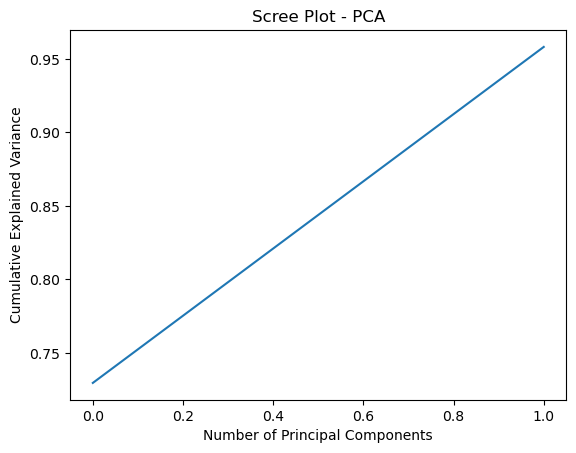

In [16]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot - PCA")
plt.show()

In [19]:
X_train,X_test,y_train,y_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42
)
model = LogisticRegression()
model.fit(X_train, y_train)
LogisticRegression()

LogisticRegression()

In [20]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy after PCA:", accuracy)

Model Accuracy after PCA: 0.9


In [21]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

In [ ]:
plt.figure()
plt.scatter(X_2d[:,0],X_2d[:,1], c=y)
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.title("PC